# Basic checks of CREDIT ERA5 inputs

In [1]:
import numpy as np
import xarray as xr
from glob import glob

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Variable name and file size consistency checks

In [3]:
# filenames = sorted(glob('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_air/*.zarr'))

# for i_fn, fn in enumerate(filenames):
#     try:
#         ds_temp = xr.open_zarr(fn)
#         # print(list(ds_temp.keys()))
#         variable_sizes = [var.size for var_name, var in ds_temp.data_vars.items()]
#         print(variable_sizes)
#     except:
#         print(fn)

In [4]:
# filenames = sorted(glob('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/accum/*.zarr'))

# for i_fn, fn in enumerate(filenames):
#     try:
#         ds_temp = xr.open_zarr(fn)
#         # print(list(ds_temp.keys()))
#         variable_sizes = [var.size for var_name, var in ds_temp.data_vars.items()]
#         print(variable_sizes)
#     except:
#         print(fn)

In [5]:
# filenames = sorted(glob('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/surf/*.zarr'))

# for i_fn, fn in enumerate(filenames):
#     try:
#         ds_temp = xr.open_zarr(fn)
#         # print(list(ds_temp.keys()))
#         variable_sizes = [var.size for var_name, var in ds_temp.data_vars.items()]
#         print(variable_sizes)
#     except:
#         print(fn)

## NaN checks

In [6]:
# def check_nans_ds(ds):
#     return ds.to_array().isnull().any().compute().item()
#     # return bool(ds.to_array().isnull().any().compute())

def check_nans_ds(ds):
    nan_vars = []
    for var in ds.data_vars:
        # Check if there are any NaNs in the variable
        if ds[var].isnull().any():
            nan_vars.append(var)
    return nan_vars

In [7]:
filenames = sorted(
    glob('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_1deg/all_in_one/*.zarr'))
#glob('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/all_in_one/*.zarr'))

for i_fn, fn in enumerate(filenames):
    ds_temp = xr.open_zarr(fn)
    nan_vars = check_nans_ds(ds_temp)
    
    if nan_vars:
        print('Dataset contains NaNs in the following variables:')
        for var in nan_vars:
            print(f"- {nan_vars}")
        print(f"File: {fn}")
    else:
        print('Dataset does not contain NaNs')

Dataset does not contain NaNs
Dataset does not contain NaNs
Dataset does not contain NaNs
Dataset does not contain NaNs
Dataset does not contain NaNs
Dataset does not contain NaNs



KeyboardInterrupt



In [7]:
filenames[0]

'/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_1deg/all_in_one/ERA5_plevel_1deg_6h_1979_bilinear.zarr'

## Check training_log

In [3]:
ds = xr.open_zarr('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_1deg/all_in_one/ERA5_plevel_1deg_6h_1979_bilinear.zarr')

In [12]:
mask = np.array(ds['land_sea_CI_mask'].isel(time=999))

In [14]:
np.std(mask)

0.614922

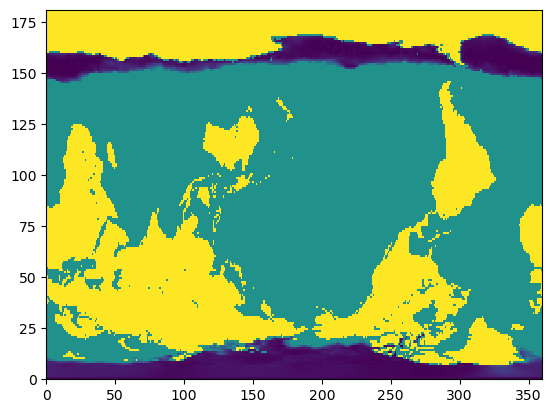

In [13]:
plt.pcolormesh(mask)

In [5]:
xr.open_zarr('/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_1deg/static/ERA5_plevel_1deg_6h_static.zarr')

<xarray.Dataset>
Dimensions:                  (latitude: 181, longitude: 360)
Coordinates:
  * latitude                 (latitude) int64 90 89 88 87 86 ... -87 -88 -89 -90
  * longitude                (longitude) int64 0 1 2 3 4 ... 355 356 357 358 359
Data variables:
    geopotential_at_surface  (latitude, longitude) float32 dask.array<chunksize=(181, 360), meta=np.ndarray>
    land_sea_mask            (latitude, longitude) float32 dask.array<chunksize=(181, 360), meta=np.ndarray>
    z_norm                   (latitude, longitude) float32 dask.array<chunksize=(181, 360), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [7]:
import pandas as pd

In [18]:
train_log = pd.read_csv('/glade/work/ksha/CREDIT_runs/fuxi_physics_base/training_log.csv')

In [14]:
list_vars = list(train_log.keys())

In [15]:
for var in list_vars:
    if 'Z' in var:
        print(var)

train_mae_Z_21
valid_mae_Z_21
train_rmse_Z_21
valid_rmse_Z_21
train_acc_Z_21
valid_acc_Z_21
train_mse_Z_21
valid_mse_Z_21


In [17]:
train_log['valid_rmse_total_precipitation']

0     0.224577
1     0.208080
2     0.199396
3     0.193013
4     0.187896
5     0.184364
6     0.182825
7     0.179738
8     0.177430
9     0.175434
10    0.173303
11         NaN
12    0.172757
13    0.171024
14    0.169977
15    0.169221
16    0.167740
17    0.167280
18    0.166214
19    0.165525
20    0.164552
Name: valid_rmse_total_precipitation, dtype: float64

In [19]:
train_log['valid_rmse_total_precipitation']

0     0.220398
1     0.205920
2     0.197221
3     0.191002
4     0.186305
5     0.182666
6          NaN
7     0.182169
8     0.177756
9     0.175492
10    0.173323
11    0.171431
12    0.170522
13    0.168965
14    0.167701
15    0.166467
16    0.165390
17    0.165108
18    0.163856
19    0.162901
20    0.161952
21    0.161341
22    0.161288
23    0.160306
Name: valid_rmse_total_precipitation, dtype: float64

## Mass-conserved integral check

In [7]:
path_subset = '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_subset/'
path_original = '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_air/'
subset_level = np.array([1, 250, 450, 550, 650, 750, 850, 950, 1000])

In [8]:
ds_subset = xr.open_zarr(path_subset+'ERA5_subset_6h_upper_L8_1980.zarr')
ds_original = xr.open_zarr(path_original+'ERA5_plevel_6h_upper_air_1980.zarr')

In [9]:
for i in range(721):
    for j in range(1440):
        
        T_subset = np.array(ds_subset['Q'].isel(time=999, latitude=i, longitude=j))
        int_subset = np.sum(T_subset*np.diff(subset_level))
        
        T_original = np.array(ds_original['Q'].isel(time=999, latitude=i, longitude=j))
        int_original = np.trapz(T_original, np.array(ds_original['level']))

        int_diff = np.abs(int_subset - int_original)
        
        if int_diff > 1e-7 or np.isnan(int_diff): 
            print('diff: {}, ix: {}, iy: {}'.format(i, j))
        
print('... done ...')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x14f9002d4110>>
Traceback (most recent call last):
  File "/glade/work/ksha/miniconda3/envs/credit/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



In [3]:
ds_subset = xr.open_zarr(path_subset+'ERA5_subset_6h_Q_1984.zarr')
ds_original = xr.open_zarr(path_original+'ERA5_plevel_6h_Q_1984.zarr')

In [4]:
for i in range(721):
    for j in range(1440):

        T_subset = np.array(ds_subset['specific_total_water'].isel(time=999, latitude=i, longitude=j))
        int_subset = np.sum(T_subset*np.diff(subset_level))
        
        T_original = np.array(ds_original['specific_total_water'].isel(time=999, latitude=i, longitude=j))
        int_original = np.trapz(T_original, np.array(ds_original['level']))

        int_diff = np.abs(int_subset - int_original)
        
        if int_diff > 1e-7: 
            print('diff: {}, ix: {}, iy: {}'.format(i, j))

print('... done ...')


KeyboardInterrupt



### Check specific total water

In [ ]:
year = 1980

test_upper_sub = xr.open_zarr(
    f'/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_subset/ERA5_subset_6h_upper_air_{year}.zarr')

test_upper_full = xr.open_zarr(
    f'/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_air/ERA5_plevel_6h_upper_air_{year}.zarr')

test_q_sub = xr.open_zarr(
    f'/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_subset/ERA5_subset_6h_Q_{year}.zarr')

test_q_full = xr.open_zarr(
    f'/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_air/ERA5_plevel_6h_Q_{year}.zarr')

test_cloud = xr.open_zarr(
    f'/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/cloud/ERA5_plevel_6h_cloud_{year}.zarr')

data_q_sub = np.array(test_upper_sub['Q'].isel(time=999))
data_q_full = np.array(test_upper_full['Q'].isel(time=999))
data_sw_sub = np.array(test_q_sub['specific_total_water'].isel(time=999))
data_sw_full = np.array(test_q_full['specific_total_water'].isel(time=999))

data_cloud_c1 = np.array(test_cloud['CIWC'].isel(time=999))
data_cloud_c2 = np.array(test_cloud['CLWC'].isel(time=999))
data_cloud_c3 = np.array(test_cloud['CRWC'].isel(time=999))
data_cloud_c4 = np.array(test_cloud['CSWC'].isel(time=999))

In [ ]:
check = data_sw_full - data_q_full - data_cloud_c1 - data_cloud_c2 - data_cloud_c3 - data_cloud_c4

In [2]:
test_q = xr.open_zarr(
    '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_air/ERA5_plevel_6h_Q_1979.zarr')
test_upper = xr.open_zarr(
    '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_air/ERA5_plevel_6h_upper_air_1979.zarr')
test_cloud = xr.open_zarr(
    '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/cloud/ERA5_plevel_6h_cloud_1979.zarr')

In [5]:
check_np = np.array(check.isel(time=888))

In [6]:
chheck_val = np.array(test_q['specific_total_water'].isel(time=888))

In [16]:
np.sum(check_np[-1, ...])

3.3143442e-07

In [17]:
np.sum(check_np)

3.2872508e-06

In [18]:
np.sum(chheck_val)

76509.586

76509.586 vs. error=3.2872508e-06

In [14]:
test_q = xr.open_zarr(
    '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_subset/ERA5_subset_6h_Q_1982.zarr')
test_upper = xr.open_zarr(
    '/glade/derecho/scratch/ksha/CREDIT_data/ERA5_plevel_base/upper_subset/ERA5_subset_6h_upper_air_1982.zarr')

In [15]:
subset_level = np.array([1, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000])

In [16]:
Q = np.array(test_q['specific_total_water'].isel(time=999, latitude=200, longitude=300))

In [17]:
np.sum(Q*np.diff(subset_level))

2.986603171292245

In [18]:
Q2 = np.array(test_upper['Q'].isel(time=999, latitude=200, longitude=300))

In [19]:
np.sum(Q2*np.diff(subset_level))

2.9611165977153178

In [20]:
Q2

array([3.09241291e-06, 3.17549366e-06, 4.06696586e-06, 5.52862934e-06,
       2.34801792e-05, 1.51609769e-04, 6.28170528e-04, 1.49570080e-03,
       3.88235948e-03, 5.48442174e-03, 5.99472597e-03, 6.02198578e-03,
       6.02198578e-03])